# Simple Salesforce

## 1) Get a list of objects

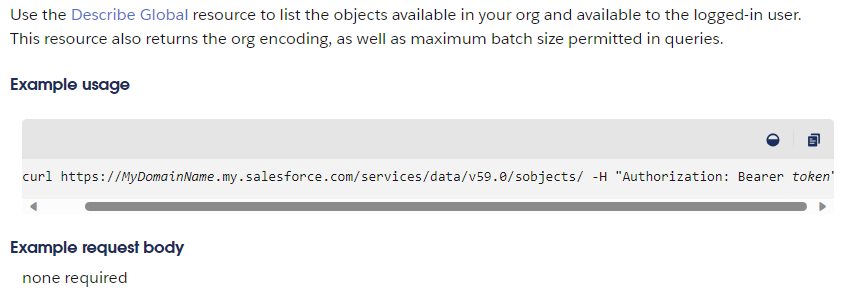

[Documentation](https://developer.salesforce.com/docs/atlas.en-us.api_rest.meta/api_rest/dome_describeGlobal.htm)

In [1]:
class Salesforce:
    def __init__(self):
        self.headers = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer ' + 'self.session_id',
        'X-PrettyPrint': '1'
        }

        self.base_url = ('https://myinstance/services/data/v59.0/')

    def describe(self, **kwargs):
        """Describes all available objects
        Arguments:
        * keyword arguments supported by requests.request (e.g. json, timeout)
        """
        url = self.base_url + "sobjects"
        print('\n Chamando _call_salesforce...\n')

        result = self._call_salesforce('GET', url, name='describe', **kwargs)

        #json_result = self.parse_result_to_json(result)
        #if len(json_result) == 0:
        #    return None

        #return json_result

    def _call_salesforce(self, method, url, name="", **kwargs):
        """Utility method for performing HTTP call to Salesforce.
        Returns a `requests.result` object.
        """
        headers = self.headers.copy()
        print(f'Headers: {headers}')
        additional_headers = kwargs.pop('headers', {})
        headers.update(additional_headers)

        #result = self.session.request(
        #    method, url, headers=headers, **kwargs)

        #if self._salesforce_login_partial is not None \
        #        and result.status_code == 401:
        #    error_details = result.json()[0]
        #    if error_details['errorCode'] == 'INVALID_SESSION_ID':
        #        self._refresh_session()
        #        return self._call_salesforce(method, url, name, **kwargs)

        #if result.status_code >= 300:
        #    exception_handler(result, name=name)

        #sforce_limit_info = result.headers.get('Sforce-Limit-Info')
        #if sforce_limit_info:
        #    self.api_usage = self.parse_api_usage(sforce_limit_info)

        print(f'Estou fazendo um request:')
        print(f'Metodo: {method}')
        print(f'Url: {url}')
        print(f'Headers: {headers}')
        print(f'**kwargs: {kwargs}')

sf = Salesforce()
sf.describe()


 Chamando _call_salesforce...

Headers: {'Content-Type': 'application/json', 'Authorization': 'Bearer self.session_id', 'X-PrettyPrint': '1'}
Estou fazendo um request:
Metodo: GET
Url: https://myinstance/services/data/v59.0/sobjects
Headers: {'Content-Type': 'application/json', 'Authorization': 'Bearer self.session_id', 'X-PrettyPrint': '1'}
**kwargs: {}


## 2) Get Metadata for an Object

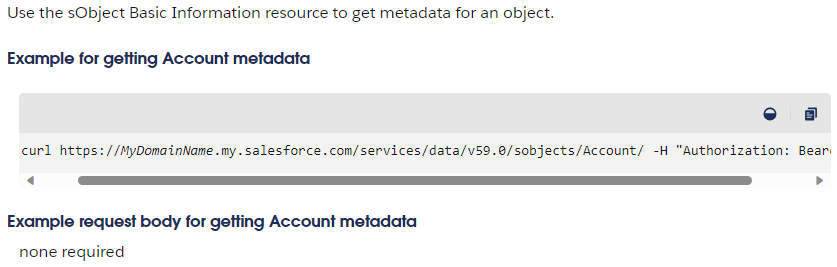

[Documentation](https://developer.salesforce.com/docs/atlas.en-us.api_rest.meta/api_rest/dome_sobject_basic_info.htm)

In [39]:
class Salesforce:
    def __init__(self):
        self.headers = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer ' + 'self.session_id',
        'X-PrettyPrint': '1'
        }

        self.base_url = ('https://myinstance/services/data/v59.0/')

    def describe(self, **kwargs):
        """Describes all available objects
        Arguments:
        * keyword arguments supported by requests.request (e.g. json, timeout)
        """
        url = self.base_url + "sobjects"
        print('Estou em Salesforce.describe \n Chamando _call_salesforce...\n')

        result = self._call_salesforce('GET', url, name='describe', **kwargs)

        #json_result = self.parse_result_to_json(result)
        #if len(json_result) == 0:
        #    return None

        #return json_result

    def _call_salesforce(self, method, url, name="", **kwargs):
        """Utility method for performing HTTP call to Salesforce.
        Returns a `requests.result` object.
        """
        headers = self.headers.copy()
        print(f'Headers: {headers}')
        additional_headers = kwargs.pop('headers', {})
        headers.update(additional_headers)

        #result = self.session.request(
        #    method, url, headers=headers, **kwargs)

        #if self._salesforce_login_partial is not None \
        #        and result.status_code == 401:
        #    error_details = result.json()[0]
        #    if error_details['errorCode'] == 'INVALID_SESSION_ID':
        #        self._refresh_session()
        #        return self._call_salesforce(method, url, name, **kwargs)

        #if result.status_code >= 300:
        #    exception_handler(result, name=name)

        #sforce_limit_info = result.headers.get('Sforce-Limit-Info')
        #if sforce_limit_info:
        #    self.api_usage = self.parse_api_usage(sforce_limit_info)

        print(f'[Salesforce] Estou fazendo um request:')
        print(f'Metodo: {method}')
        print(f'Url: {url}')
        print(f'Headers: {headers}')
        print(f'**kwargs: {kwargs}')

    def __getattr__(self, name):

        print('Estou executando a função __getattr__')
        print('Estou recebedno o nome:', name ,'\n')

        if name.startswith('__'):
            return super().__getattr__(name)

        return SFType(name)


class SFType:
    def __init__(self, name):
        self.base_url = (
            'https://myinstance/services/data/v59.0/sobjects'
            f'/{name}/')

    def metadata(self, headers=None):
        """Returns the result of a GET to `.../{object_name}/` as a dict
        decoded from the JSON payload returned by Salesforce.
        Arguments:
        * headers -- a dict with additional request headers.
        """
        print('Estou acessando a classe SFType, methodo "metadata" \n e vou chamar a salesforce')
        print()
        print('metodo: GET')
        print('url:', self.base_url)
        print('headers:', headers)

        result = self._call_salesforce('GET', self.base_url, headers=headers)
        #return result

    def describe(self, headers=None):
        """Returns the result of a GET to `.../{object_name}/describe` as a
        dict decoded from the JSON payload returned by Salesforce.
        Arguments:
        * headers -- a dict with additional request headers.
        """
        print('Estou em Salesforce.describe \n Chamando _call_salesforce...\n')
        result = self._call_salesforce(
            method='GET', url= self.base_url + 'describe',
            headers=headers
            )
        #return self.parse_result_to_json(result)



    def _call_salesforce(self, method, url, **kwargs):
        """Utility method for performing HTTP call to Salesforce.

        Returns a `requests.result` object.
        """
        headers = {
            'Content-Type': 'application/json',
            'Authorization': 'Bearer ' + 'self.session_id',
            'X-PrettyPrint': '1'
            }
        additional_headers = kwargs.pop('headers', {})
        headers.update(additional_headers or {})

        print('Estou em _call_salesforce, e vou fazer um request:\n')
        print('metodo: ', method, 'url:', url, 'headers:', headers, '\n')
        #result = self.session.request(method, url, headers=headers, **kwargs)
        #: pylint: disable=W0212
        #if (self.salesforce
        #        and self.salesforce._salesforce_login_partial is not None
        #        and result.status_code == 401):
        #    error_details = result.json()[0]
        #    if error_details['errorCode'] == 'INVALID_SESSION_ID':
        #        self.salesforce._refresh_session()
        #        return self._call_salesforce(method, url, **kwargs)

        #if result.status_code >= 300:
        #    exception_handler(result, self.name)

        #sforce_limit_info = result.headers.get('Sforce-Limit-Info')
        #if sforce_limit_info:
        #    self.api_usage = Salesforce.parse_api_usage(sforce_limit_info)

        #return result

In [40]:
sf = Salesforce()
sf.Lead.metadata()

Estou executando a função __getattr__
Estou recebedno o nome: Lead 

Estou acessando a classe SFType, methodo "metadata" 
 e vou chamar a salesforce

metodo: GET
url: https://myinstance/services/data/v59.0/sobjects/Lead/
headers: None
Estou em _call_salesforce, e vou fazer um request:

metodo:  GET url: https://myinstance/services/data/v59.0/sobjects/Lead/ headers: {'Content-Type': 'application/json', 'Authorization': 'Bearer self.session_id', 'X-PrettyPrint': '1'} 



In [41]:
sf_object = ['Case', 'Custom1__c', 'Custom2__c']
sf = Salesforce()
for each in sf_object:
    #SFType(each).metadata()
    sf.__getattr__(each).metadata()

Estou executando a função __getattr__
Estou recebedno o nome: Case 

Estou acessando a classe SFType, methodo "metadata" 
 e vou chamar a salesforce

metodo: GET
url: https://myinstance/services/data/v59.0/sobjects/Case/
headers: None
Estou em _call_salesforce, e vou fazer um request:

metodo:  GET url: https://myinstance/services/data/v59.0/sobjects/Case/ headers: {'Content-Type': 'application/json', 'Authorization': 'Bearer self.session_id', 'X-PrettyPrint': '1'} 

Estou executando a função __getattr__
Estou recebedno o nome: Custom1__c 

Estou acessando a classe SFType, methodo "metadata" 
 e vou chamar a salesforce

metodo: GET
url: https://myinstance/services/data/v59.0/sobjects/Custom1__c/
headers: None
Estou em _call_salesforce, e vou fazer um request:

metodo:  GET url: https://myinstance/services/data/v59.0/sobjects/Custom1__c/ headers: {'Content-Type': 'application/json', 'Authorization': 'Bearer self.session_id', 'X-PrettyPrint': '1'} 

Estou executando a função __getattr__


## 3) Get Field and Other Metadata for an Object

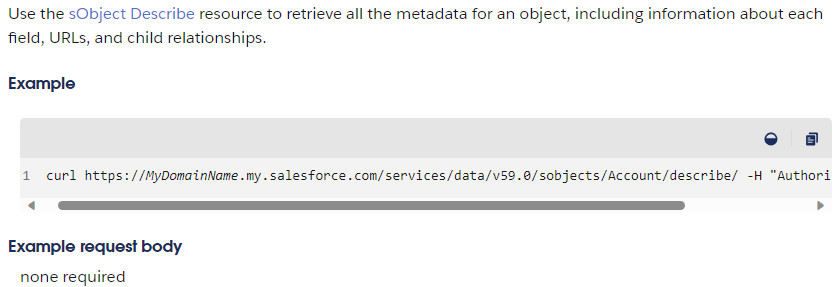

In [32]:
# RESPONSE
{
  "name" : "Account",
  "fields" :
  [
    {
      "length" : 18,
      "name" : "Id",
      "type" : "id",
      "defaultValue" : {    "value" : null  },
      "updateable" : false,
      "label" : "Account ID",
      ...
    },

    ...

  ],


  "updateable" : true,
  "label" : "Account",
  "keyPrefix" : "001",
  "custom" : false,

  ...

  "urls" :
  {
    "uiEditTemplate" : "https://MyDomainName.my.salesforce.com/{ID}/e",
    "sobject" : "/services/data/v59.0/sobjects/Account",
    "uiDetailTemplate" : "https://MyDomainName.my.salesforce.com/{ID}",
    ...
  },

  "childRelationships" :
  [
    {
      "field" : "ParentId",
      "deprecatedAndHidden" : false,
      ...
    },

    ....

  ],

  "createable" : true,
  "customSetting" : false,
  ...
}

SyntaxError: ignored

[Documentation](https://developer.salesforce.com/docs/atlas.en-us.api_rest.meta/api_rest/dome_sobject_describe.htm)

In [42]:
sf.Lead.describe()

Estou executando a função __getattr__
Estou recebedno o nome: Lead 

Estou em Salesforce.describe 
 Chamando _call_salesforce...

Estou em _call_salesforce, e vou fazer um request:

metodo:  GET url: https://myinstance/services/data/v59.0/sobjects/Lead/describe headers: {'Content-Type': 'application/json', 'Authorization': 'Bearer self.session_id', 'X-PrettyPrint': '1'} 



In [43]:
sf.__getattr__('Lead').describe()

Estou executando a função __getattr__
Estou recebedno o nome: Lead 

Estou em Salesforce.describe 
 Chamando _call_salesforce...

Estou em _call_salesforce, e vou fazer um request:

metodo:  GET url: https://myinstance/services/data/v59.0/sobjects/Lead/describe headers: {'Content-Type': 'application/json', 'Authorization': 'Bearer self.session_id', 'X-PrettyPrint': '1'} 



In [ ]:
describe_response = mdapi.CustomObject.describe()
custom_object = mdapi.CustomObject.read("CustomObject__c")
custom_object.sharingModel = mdapi.SharingModel("ReadWrite")
mdapi.CustomObject.update(custom_object)
mdapi.CustomObject.rename("CustomObject__c", "CustomObject2__c")
mdapi.CustomObject.delete("CustomObject2__c")